In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [196]:
df=pd.read_csv("C:/Users/Yaniv/Desktop/python/bitcoin prediction/market-price.csv")

In [226]:
df.head()

,Date,Price,day,month,year
0,27-10-2021 00:00,60345.17,27,10,2021
1,28-10-2021 00:00,58538.49,28,10,2021
2,29-10-2021 00:00,60587.09,29,10,2021
3,30-10-2021 00:00,62249.18,30,10,2021
4,31-10-2021 00:00,61731.29,31,10,2021


In [198]:
df.columns

Index(['26-10-2021 00:00', '63070.54'], dtype='object')

In [199]:
df.columns=['Date',"Price"]

In [200]:
df

,Date,Price
0,27-10-2021 00:00,60345.17
1,28-10-2021 00:00,58538.49
2,29-10-2021 00:00,60587.09
3,30-10-2021 00:00,62249.18
4,31-10-2021 00:00,61731.29
...,...,...
360,22-10-2022 00:00,19171.34
361,23-10-2022 00:00,19205.45
362,24-10-2022 00:00,19565.91
363,25-10-2022 00:00,19338.90


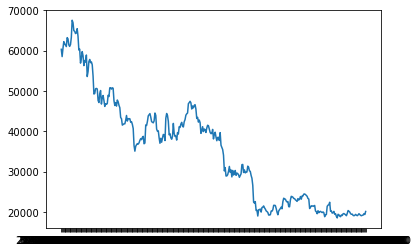

In [201]:
plt.plot(df["Date"],df["Price"])

In [202]:
def day(date):
    str=date.split('-')
    
    return str[0]
def month(date):
    str=date.split('-')
    return str[1]



def year(date):
    str=date.split('-')
    s=str[2].split(' ')
    return s[0]


In [203]:
year("2-2-2021")

'2021'

In [204]:
year("2021-2-2")
dates=df["Date"]
dates

0      27-10-2021 00:00
1      28-10-2021 00:00
2      29-10-2021 00:00
3      30-10-2021 00:00
4      31-10-2021 00:00
             ...       
360    22-10-2022 00:00
361    23-10-2022 00:00
362    24-10-2022 00:00
363    25-10-2022 00:00
364    26-10-2022 00:00
Name: Date, Length: 365, dtype: object

In [205]:
df['day']=df.Date.apply(day)
df['month']=df.Date.apply(month)

df['year']=df.Date.apply(year)

In [206]:
df

,Date,Price,day,month,year
0,27-10-2021 00:00,60345.17,27,10,2021
1,28-10-2021 00:00,58538.49,28,10,2021
2,29-10-2021 00:00,60587.09,29,10,2021
3,30-10-2021 00:00,62249.18,30,10,2021
4,31-10-2021 00:00,61731.29,31,10,2021
...,...,...,...,...,...
360,22-10-2022 00:00,19171.34,22,10,2022
361,23-10-2022 00:00,19205.45,23,10,2022
362,24-10-2022 00:00,19565.91,24,10,2022
363,25-10-2022 00:00,19338.90,25,10,2022


In [207]:
df

,Date,Price,day,month,year
0,27-10-2021 00:00,60345.17,27,10,2021
1,28-10-2021 00:00,58538.49,28,10,2021
2,29-10-2021 00:00,60587.09,29,10,2021
3,30-10-2021 00:00,62249.18,30,10,2021
4,31-10-2021 00:00,61731.29,31,10,2021
...,...,...,...,...,...
360,22-10-2022 00:00,19171.34,22,10,2022
361,23-10-2022 00:00,19205.45,23,10,2022
362,24-10-2022 00:00,19565.91,24,10,2022
363,25-10-2022 00:00,19338.90,25,10,2022


In [208]:
X=df[['day','month','year']]
y=df['Price']

,day,month,year
0,27,10,2021
1,28,10,2021
2,29,10,2021
3,30,10,2021
4,31,10,2021
...,...,...,...
360,22,10,2022
361,23,10,2022
362,24,10,2022
363,25,10,2022


In [210]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [230]:
X_train

,day,month,year
5,01,11,2021
49,15,12,2021
51,17,12,2021
93,28,01,2022
126,02,03,2022
...,...,...,...
66,01,01,2022
256,10,07,2022
285,08,08,2022
208,23,05,2022


In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
lr=LinearRegression()


In [233]:
lr.fit(X_train,y_train)

LinearRegression()

In [234]:
lr.score(X_test,y_test)

0.9151418581891808

In [236]:
lr.predict([['09','08','2022']])

E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([23488.86321147])

In [237]:
import pickle
with open('Bitcoin_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [239]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("bitcoin_columns.json","w") as f:
    f.write(json.dumps(columns))